In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:/Users/icear/Desktop/DACON/해외 축구선수 이적료 예측/FIFA_train.csv')
test=pd.read_csv('C:/Users/icear/Desktop/DACON/해외 축구선수 이적료 예측/FIFA_test.csv')

In [3]:
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [4]:
# 1. id : 선수 고유의 아이디
# 2. name : 이름
# 3. age : 나이
# 4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
# 5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
# 6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
# 7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
# 8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
# 9. stat_overall : 선수의 현재 능력치 입니다.
# 10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
# 11. stat_skill_moves : 선수의 개인기 능력치 입니다.
# 12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

In [5]:
data.isnull().sum() # 데이터가 정상적으로 다 들어옴 null값이 없다.

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

# EDA

In [6]:
# Age 
print('unique age :\n',data.age.unique()) # age의 unique
print('age counts \n',data.groupby(['age'])['value'].count()) # age의 갯수

unique age :
 [31 27 32 25 26 29 33 30 40 24 28 34 23 22 35 36 21 18 19 37 20 39 17 38
 16]
age counts 
 age
16     18
17    131
18    344
19    491
20    582
21    676
22    632
23    663
24    691
25    654
26    708
27    581
28    532
29    472
30    476
31    347
32    285
33    202
34    216
35     89
36     64
37     42
38     17
39     16
40      3
Name: value, dtype: int64


Text(0.5, 1.0, 'Age kdeplot')

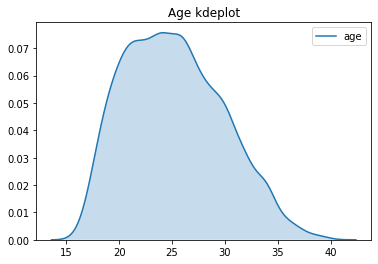

In [7]:
sns.kdeplot(data.age,shade=True).set_title('Age kdeplot') # age의 분포를 알아보기위한 kdeplot 

Text(0.5, 1.0, 'Age(boxplot)')

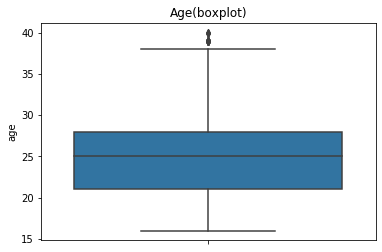

In [8]:
sns.boxplot(x=data['age'],orient = "v").set_title('Age(boxplot)') # age의 분포를 알아보기위한 boxplot

#### 20대 초반에서 중반까지 많이 분포한다. 보통 축구선수들이 20대 후반 넘어서는 은퇴를 많이 하므로 20대 중반이후로 kdeplot의 그래프가 급격하게 줄어드는걸 알 수 있다.

In [9]:
data.groupby(['age'])['value'].describe() # age 별 value의 describe

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
16,18.0,2.791667e+05,2.675612e+05,50000.0,100000.0,155000.0,337500.0,1000000.0
17,131.0,4.297710e+05,1.539523e+06,50000.0,100000.0,180000.0,400000.0,17500000.0
18,344.0,5.920203e+05,1.704083e+06,30000.0,120000.0,220000.0,525000.0,27000000.0
19,491.0,9.187475e+05,2.155731e+06,30000.0,160000.0,375000.0,775000.0,29000000.0
20,582.0,1.294974e+06,2.618790e+06,30000.0,220000.0,500000.0,1075000.0,23500000.0
21,676.0,2.091243e+06,4.337911e+06,40000.0,325000.0,700000.0,1400000.0,41000000.0
22,632.0,2.499312e+06,5.272682e+06,50000.0,400000.0,750000.0,1825000.0,54000000.0
23,663.0,3.124216e+06,5.621339e+06,40000.0,500000.0,975000.0,3200000.0,50500000.0
24,691.0,3.325760e+06,5.809014e+06,40000.0,575000.0,1000000.0,3600000.0,57000000.0


Text(0.5, 1.0, 'Age vs Value\n(scatterplot)')

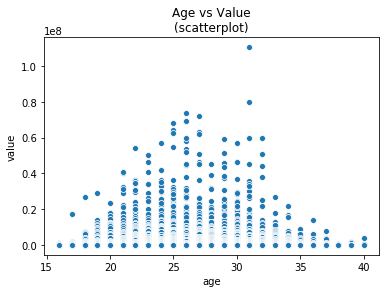

In [10]:
sns.scatterplot(data.age,data.value).set_title('Age vs Value\n(scatterplot)') # age와 value의 분포확인을 위한 scatterplot

Text(0.5, 1.0, 'Age vs Stat_overall\n(stripplot)')

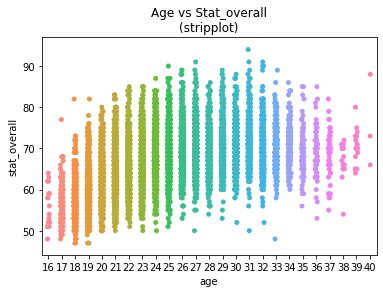

In [11]:
sns.stripplot(data.age,data.stat_overall).set_title('Age vs Stat_overall\n(stripplot)') # age와 stat_overall

#### 나이와 value 값을 비교해보면 25세에서 30세 전후로 value값이 크다. 선수들 개인마다 차이는 있겠지만 25세에서 30세 사이가 돈을 가장 많이 벌 때 인듯하다. 

In [12]:
# continent
print('continent :', data.continent.unique()) # continent의 unique

continent : ['south america' 'europe' 'africa' 'asia' 'oceania']


In [13]:
data.groupby(['continent'])['value'].mean() # continent에 따른 value

continent
africa           2.972247e+06
asia             1.035146e+06
europe           2.928125e+06
oceania          8.225429e+05
south america    3.183204e+06
Name: value, dtype: float64

Text(0.5, 1.0, 'Continent vs Value\n(barplot)')

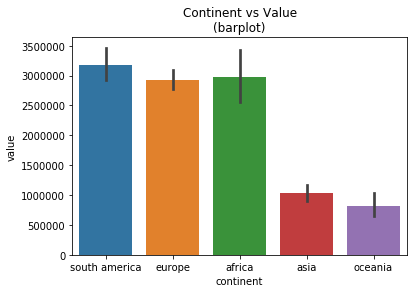

In [14]:
sns.barplot(data.continent,data.value).set_title('Continent vs Value\n(barplot)') # continent에 따른 value barplot

#### 대륙별로 value 값을 살펴보면 개인마다 다르지만 value 값이 남미가 가장 높고 그 다음 아프리카,유럽,아시아,오세아니아 순이다. 특히 아시아와 오세아니아는 다른 대륙과 value 값이 크게 차이난다

In [15]:
data.groupby(['continent'])['stat_potential'].describe()  # 대륙별 선수 발전가능성(?) 유망할거같은 선수가 어느대륙에 있나 살펴봄

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
africa,721.0,72.360610,5.438066,58.0,69.0,72.0,76.0,90.0
asia,787.0,68.208386,5.481153,48.0,64.0,68.0,72.0,87.0
europe,5322.0,72.387636,6.099490,50.0,68.0,72.0,76.0,93.0
oceania,175.0,68.640000,4.584030,59.0,65.0,68.0,72.0,83.0
south america,1927.0,72.635184,5.523599,56.0,69.0,72.0,76.0,94.0


Text(0.5, 1.0, 'Continent vs stat_potential\n(boxplot)')

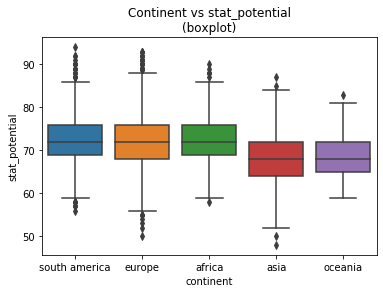

In [16]:
sns.boxplot(data.continent,data.stat_potential).set_title('Continent vs stat_potential\n(boxplot)') #대륙별 선수 발전가능성(?) boxplot

In [17]:
data.groupby(['continent'])['stat_overall'].describe() # 대륙별 선수 현재 능력치

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
africa,721.0,68.041609,5.937961,48.0,64.0,68.0,72.0,88.0
asia,787.0,63.381194,6.159215,48.0,59.0,63.0,68.0,80.0
europe,5322.0,67.083051,6.977361,47.0,63.0,67.0,71.0,91.0
oceania,175.0,63.011429,5.987524,50.0,59.0,64.0,67.0,79.0
south america,1927.0,68.643487,6.450469,47.0,65.0,69.0,73.0,94.0


Text(0.5, 1.0, 'Continent vs stat_overalll\n(boxplot)')

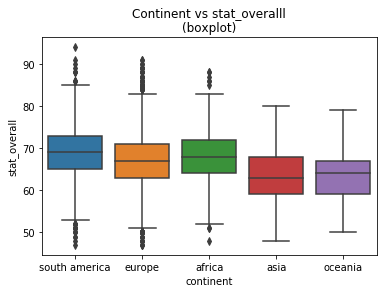

In [18]:
sns.boxplot(data.continent,data.stat_overall).set_title('Continent vs stat_overalll\n(boxplot)') #대륙별 선수 현재 능력치

#### 위에서 살펴본 대륙별 value값에서 아시아와 오세아니아가 value 값이 작은것에 대한 해답인거 같다. 현재 선수의 능력치와 발전 가능성의 수치가 작다. 

In [19]:
# contract_until
data.contract_until.unique() # 계약만료의 unique 연도로 되어있고 연도와 월,일이 같이 표기 된 것 들이 있다.

array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019'], dtype=object)

In [20]:
data[data.contract_until=='Jun 30, 2019'] # 계약만료의 데이터가 잘못된게 아닌지 확인

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
22,38,G. Higuaín,30,south america,"Jun 30, 2019",ST,right,4.0,88,88,3.0,57000000.0
108,176,M. Kovačić,24,europe,"Jun 30, 2019",MF,right,3.0,83,89,4.0,35000000.0
200,332,M. Politano,24,europe,"Jun 30, 2019",MF,left,2.0,81,84,4.0,22500000.0
217,354,S. Vrsaljko,26,europe,"Jun 30, 2019",DF,right,2.0,81,84,3.0,18000000.0
220,357,S. Zaza,27,europe,"Jun 30, 2019",ST,left,2.0,81,82,4.0,21000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8628,16257,Strefezza,21,south america,"Jun 30, 2019",ST,right,1.0,54,62,2.0,100000.0
8629,16265,T. Fantacci,21,europe,"Jun 30, 2019",MF,left,1.0,54,65,2.0,120000.0
8651,16310,A. Al Dhafeeri,20,asia,"Jun 30, 2019",MF,right,1.0,54,63,3.0,100000.0
8711,16433,L. Jacot,18,europe,"Jun 30, 2019",GK,right,1.0,53,69,1.0,100000.0


In [21]:
data.groupby(['contract_until'])['value'].mean() # 계약 만료별 value값 

contract_until
2018            1.042813e+06
2019            1.465344e+06
2020            2.387075e+06
2021            2.827543e+06
2022            5.899074e+06
2023            5.802115e+06
2024            2.450833e+07
2025            1.405333e+07
2026            5.050000e+07
Dec 31, 2018    2.531016e+06
Jan 1, 2019     8.250000e+05
Jan 12, 2019    1.000000e+05
Jan 31, 2019    6.350000e+05
Jun 30, 2019    3.067136e+06
Jun 30, 2020    4.088889e+06
May 31, 2019    2.645789e+06
May 31, 2020    7.500000e+06
Name: value, dtype: float64

In [22]:
data.groupby(['contract_until'])['age','value'].describe() # 계약만료별 나이와 value값

age                                                       \
                 count       mean       std   min    25%   50%    75%   max   
contract_until                                                                
2018             327.0  27.097859  4.969499  17.0  23.00  27.0  30.00  38.0   
2019            2366.0  26.505072  5.071557  16.0  22.25  26.0  30.00  40.0   
2020            2041.0  25.302793  4.363444  16.0  22.00  25.0  29.00  39.0   
2021            2308.0  24.443241  4.533341  16.0  21.00  24.0  28.00  40.0   
2022             761.0  24.254928  3.832778  16.0  21.00  24.0  27.00  39.0   
2023             506.0  24.934783  4.407655  16.0  22.00  24.0  28.00  39.0   
2024              12.0  22.250000  2.094365  19.0  21.00  21.5  23.50  26.0   
2025               3.0  19.666667  3.785939  17.0  17.50  18.0  21.00  24.0   
2026               1.0  23.000000       NaN  23.0  23.00  23.0  23.00  23.0   
Dec 31, 2018      64.0  24.015625  3.194699  17.0  21.75  24.0  26.00  31.0   
Jan 1, 2019        2.0  21.000000  1.414214  20.0  20.50  21.0  21.50  22.0   
Jan 12, 2019       1.0  23.000000       NaN  23.0  23.00  23.0  23.00  23.0   
Jan 31, 2019      10.0  25.200000  3.457681  21.0  23.25  24.0  28.25  31.0   
Jun 30, 2019     501.0  23.065868  3.033423  16.0  21.00  23.0  25.00  33.0   
Jun 30, 2020       9.0  23.000000  3.807887  18.0  21.00  22.0  27.00  29.0   
May 31, 2019      19.0  24.526316  4.018961  19.0  21.50  25.0  27.00  31.0   
May 31, 2020       1.0  31.000000       NaN  31.0  31.00  31.0  31.00  31.0   

                 value                                                      \
                 count          mean           std         min         25%   
contract_until                                                               
2018             327.0  1.042813e+06  1.704661e+06     10000.0    230000.0   
2019            2366.0  1.465344e+06  2.799817e+06     20000.0    300000.0   
2020            2041.0  2.387075e+06  4.877709e+06     20000.0    425000.0   
2021            2308.0  2.827543e+06  6.276837e+06     10000.0    325000.0   
2022             761.0  5.899074e+06  8.341495e+06     30000.0    800000.0   
2023             506.0  5.802115e+06  1.020079e+07     40000.0    550000.0   
2024              12.0  2.450833e+07  1.388200e+07   1100000.0  18125000.0   
2025               3.0  1.405333e+07  1.253070e+07    160000.0   8830000.0   
2026               1.0  5.050000e+07           NaN  50500000.0  50500000.0   
Dec 31, 2018      64.0  2.531016e+06  4.946659e+06    160000.0    668750.0   
Jan 1, 2019        2.0  8.250000e+05  8.131728e+05    250000.0    537500.0   
Jan 12, 2019       1.0  1.000000e+05           NaN    100000.0    100000.0   
Jan 31, 2019      10.0  6.350000e+05  3.102866e+05    200000.0    412500.0   
Jun 30, 2019     501.0  3.067136e+06  4.520370e+06     60000.0    700000.0   
Jun 30, 2020       9.0  4.088889e+06  4.481143e+06    375000.0    750000.0   
May 31, 2019      19.0  2.645789e+06  2.485858e+06    220000.0   1012500.0   
May 31, 2020       1.0  7.500000e+06           NaN   7500000.0   7500000.0   

                                                     
                       50%         75%          max  
contract_until                                       
2018              475000.0    962500.0   16500000.0  
2019              600000.0   1300000.0   45000000.0  
2020              825000.0   2400000.0   72000000.0  
2021              750000.0   2600000.0  110500000.0  
2022             2900000.0   8000000.0   73500000.0  
2023             1300000.0   7000000.0   69500000.0  
2024            22750000.0  32875000.0   53500000.0  
2025            17500000.0  21000000.0   24500000.0  
2026            50500000.0  50500000.0   50500000.0  
Dec 31, 2018      962500.0   2775000.0   36500000.0  
Jan 1, 2019       825000.0   1112500.0    1400000.0  
Jan 12, 2019      100000.0    100000.0     100000.0  
Jan 31, 2019      587500.0    825000.0    1200000.0  
Jun 30, 2019 

#### 여기서는 별로 얻을게 없어보인다. 계약만료하고 value값이랑 크게 관련있는거같지 않고 나이랑도 그렇게 큰 관련성은 없어보인다. 월,일까지 표기된 것들을 연도까지만 표기 할 필요가 있어보인다.

In [23]:
# position
print('position :',data.position.unique()) #포지션의 uniue

position : ['ST' 'GK' 'DF' 'MF']


In [24]:
data.position.value_counts() # 포지션별 갯수

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [25]:
data.groupby(['position'])['prefer_foot'].value_counts(normalize=True) # position별 오른발,왼발 비율

position  prefer_foot
DF        right          0.674310
          left           0.325690
GK        right          0.902778
          left           0.097222
MF        right          0.776838
          left           0.223162
ST        right          0.810557
          left           0.189443
Name: prefer_foot, dtype: float64

Text(0.5, 1.0, 'Position\n(countplot)')

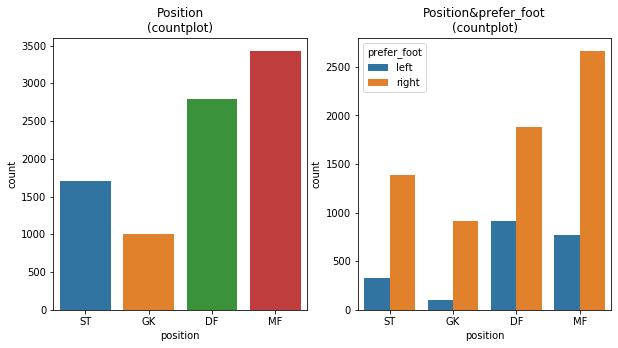

In [26]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data.position,hue=data.prefer_foot,ax=ax[1]).set_title('Position&prefer_foot\n(countplot)')
sns.countplot(data.position,ax=ax[0]).set_title('Position\n(countplot)') 
# 포지션별 오른발,왼발 갯수 및 비율 plot

#### 오른발,왼발 비율중에서 GK는 오른발 비율이 90%이상이고 DF는 다른 포지션의 비해 왼발 비율이 높다.

In [27]:
data.groupby(['position'])['value'].mean() # 포지션별 value값

position
DF    2.304348e+06
GK    1.992073e+06
MF    3.121762e+06
ST    3.330361e+06
Name: value, dtype: float64

Text(0.5, 1.0, 'Position vs Value\n(barplot)')

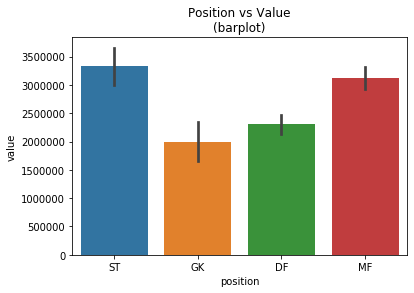

In [28]:
sns.barplot(data.position,data.value).set_title('Position vs Value\n(barplot)') # 포지션별 value값 barplot

#### 개인의 역량에 따라 다르겠지만 포지션별로 ST가 value값이 가장 높고 MF,DF,GK순으로 높다. 골을 많이 넣는 포지션이 value값이 높다

In [29]:
data.groupby(['position'])['age'].describe() # 포지션별 나이

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
DF,2791.0,25.618058,4.461819,16.0,22.0,25.0,29.0,39.0
GK,1008.0,25.791667,5.543208,16.0,21.0,25.0,30.0,40.0
MF,3428.0,24.938156,4.471708,16.0,21.0,25.0,28.0,39.0
ST,1705.0,24.740176,4.561905,16.0,21.0,24.0,28.0,39.0


In [30]:
data.groupby(['position'])['reputation'].mean() # 포지션별 유명한 정도

position
DF    1.117879
GK    1.111111
MF    1.135648
ST    1.154252
Name: reputation, dtype: float64

In [31]:
data.groupby(['position'])['stat_overall'].mean() # 포지션별 현재 능력치

position
DF    67.304192
GK    65.188492
MF    67.373104
ST    67.300293
Name: stat_overall, dtype: float64

#### 포지션하고 나이는 상관없어보이고 유명한 정도,현재 능력치 또한 상관없어보인다. 개인의 영향을 많이 받는것들이라서 상관없어보인다.

In [32]:
# prefer_foot
print('prefer_foot :',data.prefer_foot.unique()) # 선호하는 발 unique

prefer_foot : ['left' 'right']


In [33]:
data.prefer_foot.value_counts() # 선호하는 발의 갯수

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [34]:
data.groupby(['prefer_foot'])['value'].mean() # 선호하는 발의 value값

prefer_foot
left     2.865232e+06
right    2.752150e+06
Name: value, dtype: float64

Text(0.5, 1.0, 'Prefer_foot vs Value\n(barplot)')

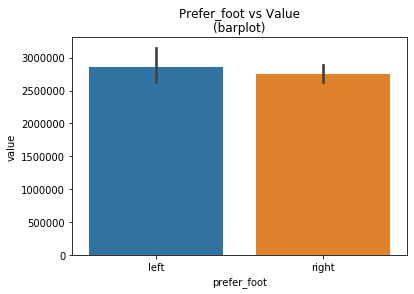

In [35]:
sns.barplot(data.prefer_foot,data.value).set_title('Prefer_foot vs Value\n(barplot)') # 선호하는 발 value값 barplot

In [36]:
data.groupby(['prefer_foot'])['value'].describe() # 선호하는 발 value의 describe

,count,mean,std,min,25%,50%,75%,max
prefer_foot,,,,,,,,
left,2095.0,2.865232e+06,6.120526e+06,20000.0,450000.0,875000.0,2750000.0,110500000.0
right,6837.0,2.752150e+06,5.752807e+06,10000.0,375000.0,800000.0,2600000.0,80000000.0


#### 오른발을 선호하는 선수들이 많지만 value값은 왼발이 더 높다. 최소,최대,중앙값 모두 왼발이 높다. 

In [37]:
data.groupby(['continent'])['prefer_foot'].value_counts(normalize=True) # 대륙별 선호하는 발 비율

continent      prefer_foot
africa         right          0.801664
               left           0.198336
asia           right          0.770013
               left           0.229987
europe         right          0.761932
               left           0.238068
oceania        right          0.788571
               left           0.211429
south america  right          0.757654
               left           0.242346
Name: prefer_foot, dtype: float64

In [38]:
data.groupby(['prefer_foot'])['reputation'].mean() # 선호하는 발별 유명한 정도

prefer_foot
left     1.127924
right    1.131783
Name: reputation, dtype: float64

In [39]:
data.groupby(['prefer_foot'])['stat_skill_moves'].mean() # 선호하는 발별 개인기 능력치

prefer_foot
left     2.554654
right    2.354834
Name: stat_skill_moves, dtype: float64

In [40]:
data.groupby(['prefer_foot'])['stat_potential'].mean() # 선호하는 발별 발전가능성(?)

prefer_foot
left     72.311217
right    71.900980
Name: stat_potential, dtype: float64

In [41]:
data.groupby(['prefer_foot'])['stat_overall'].mean() # 선호하는 발별 현재 능력치

prefer_foot
left     67.544153
right    66.952318
Name: stat_overall, dtype: float64

#### 오른발과 왼발 모두 유명한 정도는 차이가 거의 없지만 value값이 높은 왼발에서 현재 능력치,발전가능성,개인기 능력치가 조금씩 높았다. 왼발을 선호하는 선수가 능력치가 높고 더 높은 value값을 얻을수있다.

In [42]:
# reputation
print('reputation :',data.reputation.unique()) # 유명한 정도 unique

reputation : [5. 4. 3. 1. 2.]


In [43]:
print(data.reputation.value_counts(),'\n',data.reputation.value_counts(normalize=True)) # 유명한 정도 갯수와 비율

1.0    8014
2.0     706
3.0     177
4.0      31
5.0       4
Name: reputation, dtype: int64 
 1.0    0.897223
2.0    0.079042
3.0    0.019816
4.0    0.003471
5.0    0.000448
Name: reputation, dtype: float64


In [44]:
data.groupby(['reputation'])['value'].describe() # 유명한정도와 value값의 비교 describe

,count,mean,std,min,25%,50%,75%,max
reputation,,,,,,,,
1.0,8014.0,1.690092e+06,2.656534e+06,10000.0,350000.0,725000.0,1700000.0,46500000.0
2.0,706.0,8.639221e+06,7.495048e+06,20000.0,3100000.0,7000000.0,12000000.0,50500000.0
3.0,177.0,2.201483e+07,1.670103e+07,325000.0,9000000.0,17500000.0,31500000.0,73500000.0
4.0,31.0,3.342903e+07,2.013230e+07,3000000.0,16500000.0,36000000.0,48750000.0,72000000.0
5.0,4.0,6.062500e+07,4.300654e+07,14000000.0,32000000.0,59000000.0,87625000.0,110500000.0


Text(0.5, 1.0, 'Reputation vs Value\n(scatterplot)')

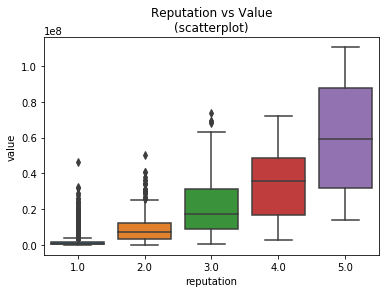

In [45]:
sns.boxplot(data.reputation,data.value).set_title('Reputation vs Value\n(scatterplot)') # 유명한정도와 value값 boxplot

#### 유명한 정도는 값이 높으면 높을수록 value값이 상승한다.

In [46]:
data.groupby(['age'])['reputation'].mean() # 나이에 따른 유명한정도

age
16    1.000000
17    1.000000
18    1.002907
19    1.006110
20    1.005155
21    1.020710
22    1.044304
23    1.063348
24    1.081042
25    1.114679
26    1.118644
27    1.179002
28    1.154135
29    1.250000
30    1.212185
31    1.354467
32    1.357895
33    1.386139
34    1.314815
35    1.359551
36    1.421875
37    1.238095
38    1.470588
39    1.437500
40    2.000000
Name: reputation, dtype: float64

Text(0.5, 1.0, 'Reputation vs Age\n(barplot)')

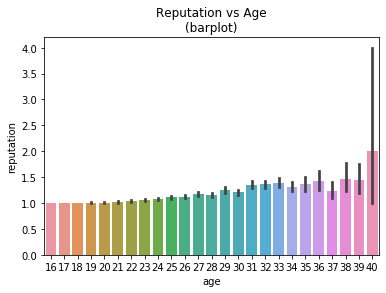

In [47]:
sns.barplot(data.age,data.reputation).set_title('Reputation vs Age\n(barplot)') # 나이에 따른 유명한정도 barplot

#### 나이가 많으면 많을수록 유명한 정도의 값은 높아진다. 하지만 나이가 많을수록 편차가 큰 걸 봐서는 개인적인 사항인거 같다.

In [48]:
# stat_overall
data.stat_overall.unique() # 현재 능력치 unique

array([94, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76,
       75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59,
       58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47], dtype=int64)

Text(0.5, 1.0, 'Stat_overall vs Value\n(scatterplot)')

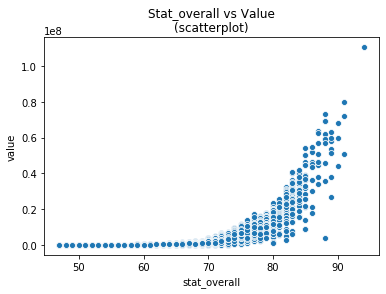

In [49]:
sns.scatterplot(data.stat_overall,data.value).set_title('Stat_overall vs Value\n(scatterplot)') # 현재 능력치별 value값

In [50]:
# stat_potential
data.stat_potential.unique() # 발전가능성 unique

array([94, 93, 91, 90, 92, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 50, 48], dtype=int64)

Text(0.5, 1.0, 'Stat_potential vs Value\n(scatterplot)')

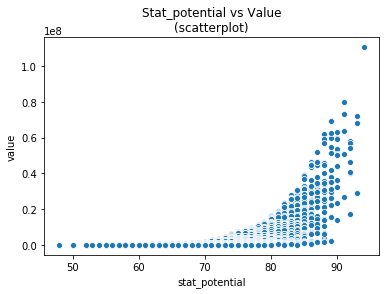

In [51]:
sns.scatterplot(data.stat_potential,data.value).set_title('Stat_potential vs Value\n(scatterplot)') # 발전가능성별 value값

#### 현재 능력치와 발전가능성이 높으면 높을수록 value값의 상승폭이 커진다. 특히, 70이 넘어서는 순간 value값이 눈에 띄게 높아진다.

In [52]:
# stat_skill_moves
data.stat_skill_moves.unique() # 개인기 능력치 unique

array([4., 1., 3., 2., 5.])

Text(0.5, 1.0, 'Stat_skill_moves vs Value\n(barplot)')

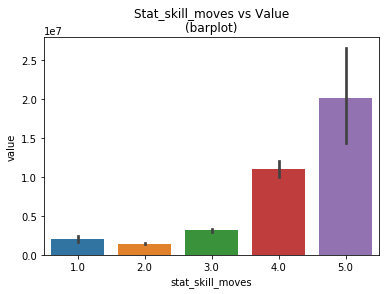

In [53]:
sns.barplot(data.stat_skill_moves,data.value).set_title('Stat_skill_moves vs Value\n(barplot)') # 개인기 능력치별 value

In [54]:
data.groupby(['stat_skill_moves'])['age'].mean() # 개인기 능력치별 나이

stat_skill_moves
1.0    25.791667
2.0    24.706530
3.0    25.483156
4.0    25.930097
5.0    26.903226
Name: age, dtype: float64

Text(0.5, 1.0, 'Stat_skill_moves vs Age\n(violinplot)')

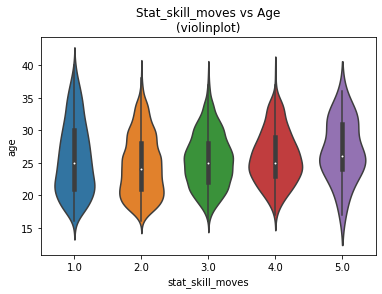

In [55]:
sns.violinplot(data.stat_skill_moves,data.age).set_title('Stat_skill_moves vs Age\n(violinplot)') # 개인기 능력치별 나이 violinplot

#### 개인기 능력치가 높으면 value값이 높고 나이가 많을수록 개인기 능력치가 조금씩 높아지는걸 알 수 있다.

Text(0.5, 1.0, 'Value(boxplot)')

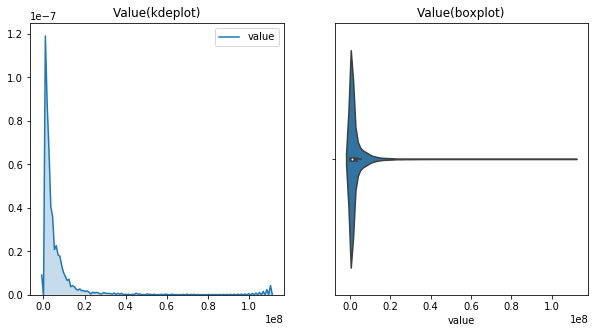

In [56]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(data.value,shade=True,ax=ax[0]).set_title('Value(kdeplot)') # value 값 kdeplot
sns.violinplot(data.value,ax=ax[1]).set_title('Value(boxplot)') # value 값 boxplot

Text(0.5, 1.0, 'Stat_potential(kdeplot)')

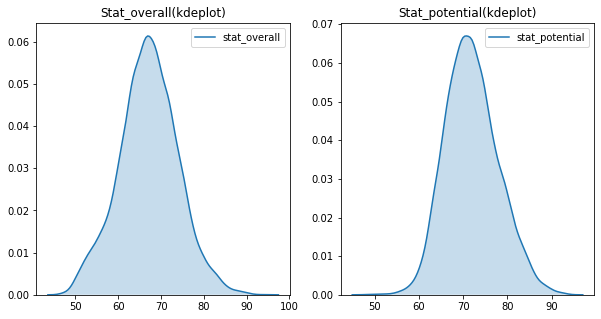

In [57]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(data.stat_overall,shade=True,ax=ax[0]).set_title('Stat_overall(kdeplot)')
sns.kdeplot(data.stat_potential,shade=True,ax=ax[1]).set_title('Stat_potential(kdeplot)')

#### value값의 정규화가 필요한거 같다.

## >> value값에 크게 영향을 미치는건 능력치,유명한정도,포지션정도 일 것 같다.

# Feature Engineering

In [58]:
# Age 카테고리화 
print('age_min:',data.age.min()) # 나이의 최대값
print('age_max:',data.age.max()) # 나이의 최소값
print('max-min:',data.age.max()-data.age.min()+1) # 나이의 최대-최소값, 5개 정도의 구간 카테고리화

age_min: 16
age_max: 40
max-min: 25


In [59]:
data.loc[data.age<=20,'age_band']=0 # data 데이터 age 카테고리화
data.loc[(data.age>=21)&(data.age<=25),'age_band']=1
data.loc[(data.age>=26)&(data.age<=30),'age_band']=2
data.loc[(data.age>=31)&(data.age<=35),'age_band']=3
data.loc[data.age>=36,'age_band']=4
test.loc[test.age<=20,'age_band']=0 # test 데이터 age 카테고리화
test.loc[(test.age>=21)&(test.age<=25),'age_band']=1
test.loc[(test.age>=26)&(test.age<=30),'age_band']=2
test.loc[(test.age>=31)&(test.age<=35),'age_band']=3
test.loc[test.age>=36,'age_band']=4

In [60]:
data.contract_until.unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019'], dtype=object)

In [61]:
# data의 contract_until의 월,일을 제거
contract_until_cut=[]
for i in data.contract_until:  # jun 30,2019이런 식으로 구분이 되어 있어서 ','로 잘라준후 2019만 가져옴
    if len(i)>4:
        print(i.split(',')[1].strip())
        contract_until_cut.append(int(i.split(',')[1].strip()))
    else:
        contract_until_cut.append(int(i))
data['contract_until_cut']=contract_until_cut

2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2020
2019
2018
2019
2019
2019
2019
2018
2019
2019
2019
2020
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2018
2018
2018
2019
2019
2019
2019
2019
2019
2020
2018
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019


In [62]:
# test contract_until의 월,일을 제거
contract_until_cut=[]
for i in test.contract_until:  # jun 30,2019이런 식으로 구분이 되어 있어서 ','로 잘라준후 2019만 가져옴
    if len(i)>4:
        print(i.split(',')[1].strip())
        contract_until_cut.append(int(i.split(',')[1].strip()))
    else:
        contract_until_cut.append(int(i))
test['contract_until_cut']=contract_until_cut

2019
2019
2019
2019
2019
2019
2020
2019
2020
2019
2019
2019
2019
2019
2019
2019
2020
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2018
2018
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2018
2019
2018
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2018
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2019
2019
2018
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2019
2018
2018
2019
2019
2019
2018
2019
2019


In [63]:
# potential-overall 앞으로 성장 할 수치
data['growth']=data.stat_potential-data.stat_overall
test['growth']=test.stat_potential-test.stat_overall

In [64]:
# age 1당 능력치
data['age_per']=data.stat_overall/data.age
test['age_per']=test.stat_overall/test.age

Text(0.5, 1.0, 'value kdeplot(log)')

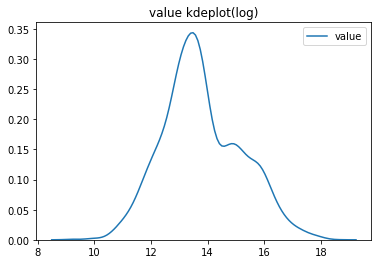

In [65]:
# value값 정규화
data.value=np.log1p(data.value)
sns.kdeplot(data.value).set_title('value kdeplot(log)')

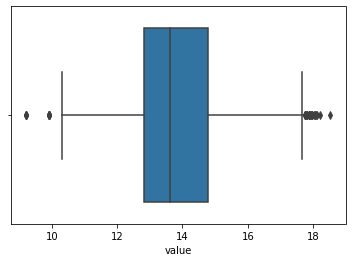

In [66]:
sns.boxplot(data.value)

In [67]:
#라벨링
data['continent'].replace(['south america','europe','africa','asia','oceania'],[0,1,2,3,4],inplace=True) # data 라벨링
data['position'].replace(['ST','MF','DF','GK'],[0,1,2,3],inplace=True)
data['prefer_foot'].replace(['right','left'],[0,1],inplace=True)

test['continent'].replace(['south america','europe','africa','asia','oceania'],[0,1,2,3,4],inplace=True) # test 라벨링
test['position'].replace(['ST','MF','DF','GK'],[0,1,2,3],inplace=True)
test['prefer_foot'].replace(['right','left'],[0,1],inplace=True)

In [68]:
# 필요없는 변수 제거
del data['name']
del data['age']
del data['contract_until']
del test['name']
del test['age']
del test['contract_until']

In [69]:
data

,id,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_band,contract_until_cut,growth,age_per
0,0,0,0,1,5.0,94,94,4.0,18.520526,3.0,2021,0,3.032258
1,3,1,3,0,4.0,91,93,1.0,18.092177,2.0,2020,2,3.370370
2,7,0,0,0,5.0,91,91,3.0,18.197537,3.0,2021,0,2.935484
3,8,1,2,0,4.0,91,91,3.0,17.747336,3.0,2020,0,2.843750
4,9,1,3,0,3.0,90,93,1.0,18.035018,1.0,2021,3,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,2,1,0,1.0,48,63,3.0,11.002117,0.0,2019,15,2.666667
8928,16936,1,2,0,1.0,47,59,2.0,10.596660,0.0,2020,12,2.473684
8929,16941,0,2,0,1.0,47,64,2.0,10.819798,0.0,2021,17,2.611111
8930,16942,1,3,0,1.0,47,65,1.0,10.819798,0.0,2021,18,2.611111


(13, 0)

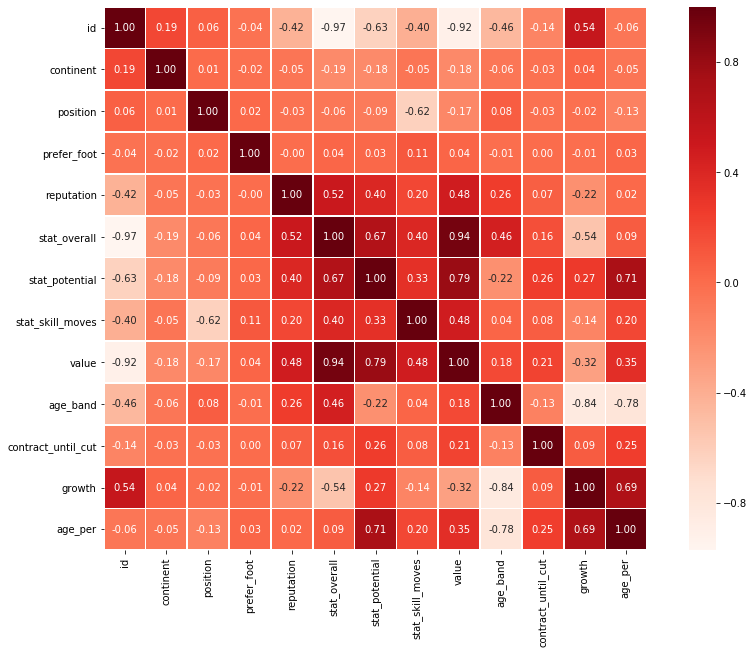

In [70]:
# 변수들간의 corr heatmap
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, square=True, fmt = '.2f', linewidths=.8, cmap='Reds' ,ax=ax).set_ylim(13,0)

In [71]:
data.corr()['value']

id                   -0.915650
continent            -0.177105
position             -0.168740
prefer_foot           0.038607
reputation            0.480683
stat_overall          0.938548
stat_potential        0.793474
stat_skill_moves      0.476796
value                 1.000000
age_band              0.184236
contract_until_cut    0.214345
growth               -0.316690
age_per               0.347182
Name: value, dtype: float64

#### corr기준 id,현재 능력치가 연관성이 깊어보인다.

In [72]:
# value 값을 value 변수로 저장 
value=data['value']
del data['value']

# Feature Importance

In [73]:
# XGBoost의 feature importance를 이용
from xgboost import XGBRegressor
from xgboost import plot_importance

In [74]:
model=XGBRegressor()
model.fit(data,value)

[20:28:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

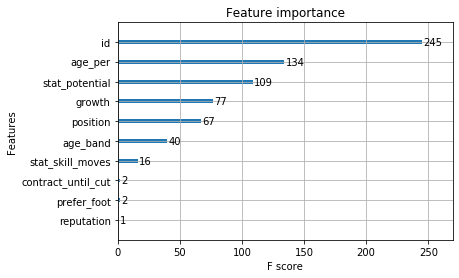

In [75]:
plot_importance(model)

#### id의 중요도가 높아보인다. id는 아마도 가격이 높은 순으로 정렬해서 이런 결과가 나온듯 싶다. 그 다음은 나이 당 성장,성장,포지션 순으로 중요도가 높고 대륙,선호하는 발,계약년도는 지워야 할 듯 하다.

In [76]:
del data['contract_until_cut']
del data['prefer_foot']
del data['reputation']
del test['contract_until_cut']
del test['prefer_foot']
del test['reputation']

In [77]:
data

,id,continent,position,stat_overall,stat_potential,stat_skill_moves,age_band,growth,age_per
0,0,0,0,94,94,4.0,3.0,0,3.032258
1,3,1,3,91,93,1.0,2.0,2,3.370370
2,7,0,0,91,91,3.0,3.0,0,2.935484
3,8,1,2,91,91,3.0,3.0,0,2.843750
4,9,1,3,90,93,1.0,1.0,3,3.600000
...,...,...,...,...,...,...,...,...,...
8927,16925,2,1,48,63,3.0,0.0,15,2.666667
8928,16936,1,2,47,59,2.0,0.0,12,2.473684
8929,16941,0,2,47,64,2.0,0.0,17,2.611111
8930,16942,1,3,47,65,1.0,0.0,18,2.611111


# Modeling

In [78]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [79]:
kfold=KFold(n_splits=10,random_state=2)
model_name=['LinearRegression','LassoRegression','ElasticNet','gboost','lgbm','xgboost','RandomForest']
model_rmse=[]
model_cv=[]
models=[LinearRegression(),  # Linear Regression
        make_pipeline(Lasso(alpha=0.001,random_state=1)),  # Lasso Regression
        make_pipeline(RobustScaler(),ElasticNet(alpha=0.001,l1_ratio=0.9,random_state=1)), # ElasticNet인데 RobustScaler를 썼다.
        GradientBoostingRegressor(random_state=1),  # GragientBoostionRegressor
        LGBMRegressor(random_state=1),  # LGBRegressor
        XGBRegressor(random_state=1),  # XGBoostRgressor
        RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state=1)]  # RandomForestRegressor
for i in models:  #모델들의 rmse를 model_rmse에 저장
    m_r=np.mean(np.sqrt(-cross_val_score(i,data.values,np.expm1(value),scoring='neg_mean_squared_error',cv=kfold)))
    model_rmse.append(m_r)

[20:28:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:28:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [80]:
model_df=pd.DataFrame({'rmse_mean':model_rmse},index=model_name) # 모델들의 rmse를 data_frame으로 변환
model_df

,rmse_mean
LinearRegression,4.277576e+06
LassoRegression,4.277576e+06
ElasticNet,4.270808e+06
gboost,1.556056e+06
lgbm,1.563684e+06
xgboost,1.565740e+06
RandomForest,1.527907e+06


In [81]:
from sklearn.model_selection import GridSearchCV 

In [82]:
# RandomForest 튜닝
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestRegressor(random_state=1),param_grid=hyper,verbose=True,scoring='neg_mean_squared_error',)
gd.fit(data,np.expm1(value))
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.4min finished
C:\Users\icear\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


-31882358700399.906
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


In [83]:
rf=RandomForestRegressor(n_estimators=600,n_jobs=-1,random_state=1)
m_r=np.mean(np.sqrt(-cross_val_score(rf,data.values,np.expm1(value),scoring='neg_mean_squared_error',cv=kfold)))
m_r

1525456.2866517892

In [84]:
rf.fit(data,value)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [85]:
# XGBooost 튜닝
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror'),param_grid=hyper,verbose=True)
gd.fit(data,np.expm1(value))
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  7.7min finished


0.0062058870785563205
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [86]:
xgb=XGBRegressor(n_estimators=300,learning_rate=0.25,objective='reg:squarederror')
xgb.fit(data,value)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [87]:
prediction=rf.predict(test)
prediction2=xgb.predict(test)
prediction=np.expm1(prediction)
prediction2=np.expm1(prediction2)

In [88]:
np.mean(np.sqrt(-cross_val_score(rf,data.values,np.expm1(value),scoring='neg_mean_squared_error',cv=kfold))) # RandomForest

1525456.2866517892

In [89]:
np.mean(np.sqrt(-cross_val_score(xgb,data.values,np.expm1(value),scoring='neg_mean_squared_error',cv=kfold))) # XGBoost

1489117.1709825438

#### 성능이 XGBoost 쪽이 높으므로 XGBoost로 예측한 것을 submit하기로 하겠다.

In [90]:
sub=pd.read_csv('C:/Users/icear/Desktop/DACON/해외 축구선수 이적료 예측/submission.csv')
sub['value']=prediction2

In [91]:
sub.to_csv('submission.csv',index=False)